<a href="https://colab.research.google.com/github/muhammadadjieprianto20092005-byte/pemograman-dasar/blob/main/pratikum%209%20tugas%20rumah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

orders = pd.read_csv("orders.csv")
orders.head()

,order_id,customer_id,payment,order_date,delivery_date
0,1,64,30811,2021-8-30,2021-09-24
1,2,473,50490,2021-2-3,2021-02-13
2,3,774,46763,2021-10-8,2021-11-03
3,4,433,39782,2021-5-6,2021-05-19
4,5,441,14719,2021-3-23,2021-03-24


In [9]:
orders.shape

(1000, 5)

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_id       1000 non-null   int64 
 1   customer_id    1000 non-null   int64 
 2   payment        1000 non-null   int64 
 3   order_date     1000 non-null   object
 4   delivery_date  1000 non-null   object
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [12]:
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['delivery_date'] = pd.to_datetime(orders['delivery_date'])

In [13]:
orders.describe()

,order_id,customer_id,payment,order_date,delivery_date
count,1000.000000,1000.000000,1000.000000,1000,1000
mean,500.500000,506.640000,33972.936000,2021-05-27 18:38:52.800000,2021-06-10 20:31:12
min,1.000000,1.000000,10043.000000,2021-01-01 00:00:00,2021-01-03 00:00:00
25%,250.750000,275.250000,21329.250000,2021-03-13 18:00:00,2021-03-28 00:00:00
50%,500.500000,515.000000,33697.500000,2021-05-27 12:00:00,2021-06-11 12:00:00
75%,750.250000,737.250000,46249.000000,2021-08-12 06:00:00,2021-08-24 06:00:00
max,1000.000000,1000.000000,59910.000000,2021-10-24 00:00:00,2021-11-20 00:00:00
std,288.819436,277.115502,14451.609047,NaN,NaN


In [14]:
orders.isnull().sum()

,0
order_id,0
customer_id,0
payment,0
order_date,0
delivery_date,0


In [15]:
orders['delivery_days'] = (orders['delivery_date'] - orders['order_date']).dt.days
orders['delivery_days'].describe()

,delivery_days
count,1000.000000
mean,14.078000
std,7.707225
min,1.000000
25%,8.000000
50%,14.000000
75%,21.000000
max,27.000000


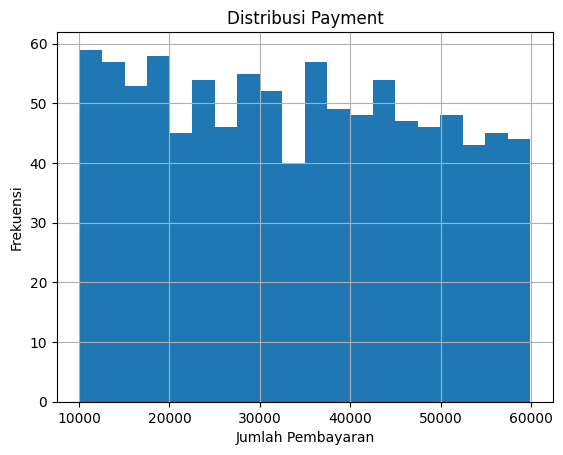

In [16]:
orders['payment'].hist(bins=20)
plt.title("Distribusi Payment")
plt.xlabel("Jumlah Pembayaran")
plt.ylabel("Frekuensi")
plt.show()

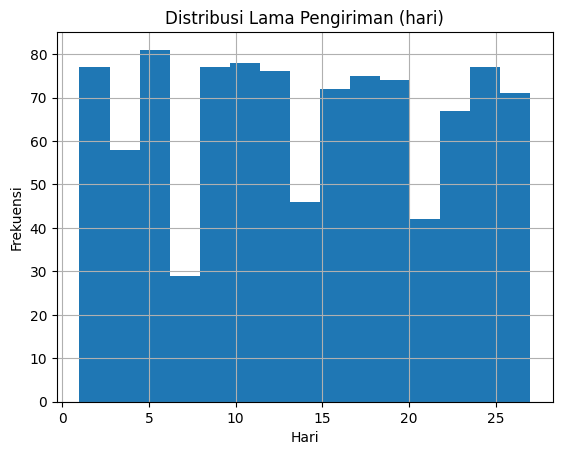

In [17]:
orders['delivery_days'].hist(bins=15)
plt.title("Distribusi Lama Pengiriman (hari)")
plt.xlabel("Hari")
plt.ylabel("Frekuensi")
plt.show()

In [18]:
orders['month'] = orders['order_date'].dt.month
orders['month'].value_counts().sort_index()

,count
month,
1,109
2,94
3,118
4,101
5,84
6,103
7,105
8,107
9,98


In [19]:
orders.groupby('month')['payment'].mean()

,payment
month,
1,32293.706422
2,33944.500000
3,34991.906780
4,32012.475248
5,36047.702381
6,32538.281553
7,34174.552381
8,35722.084112
9,32379.408163
